# merge dataframe

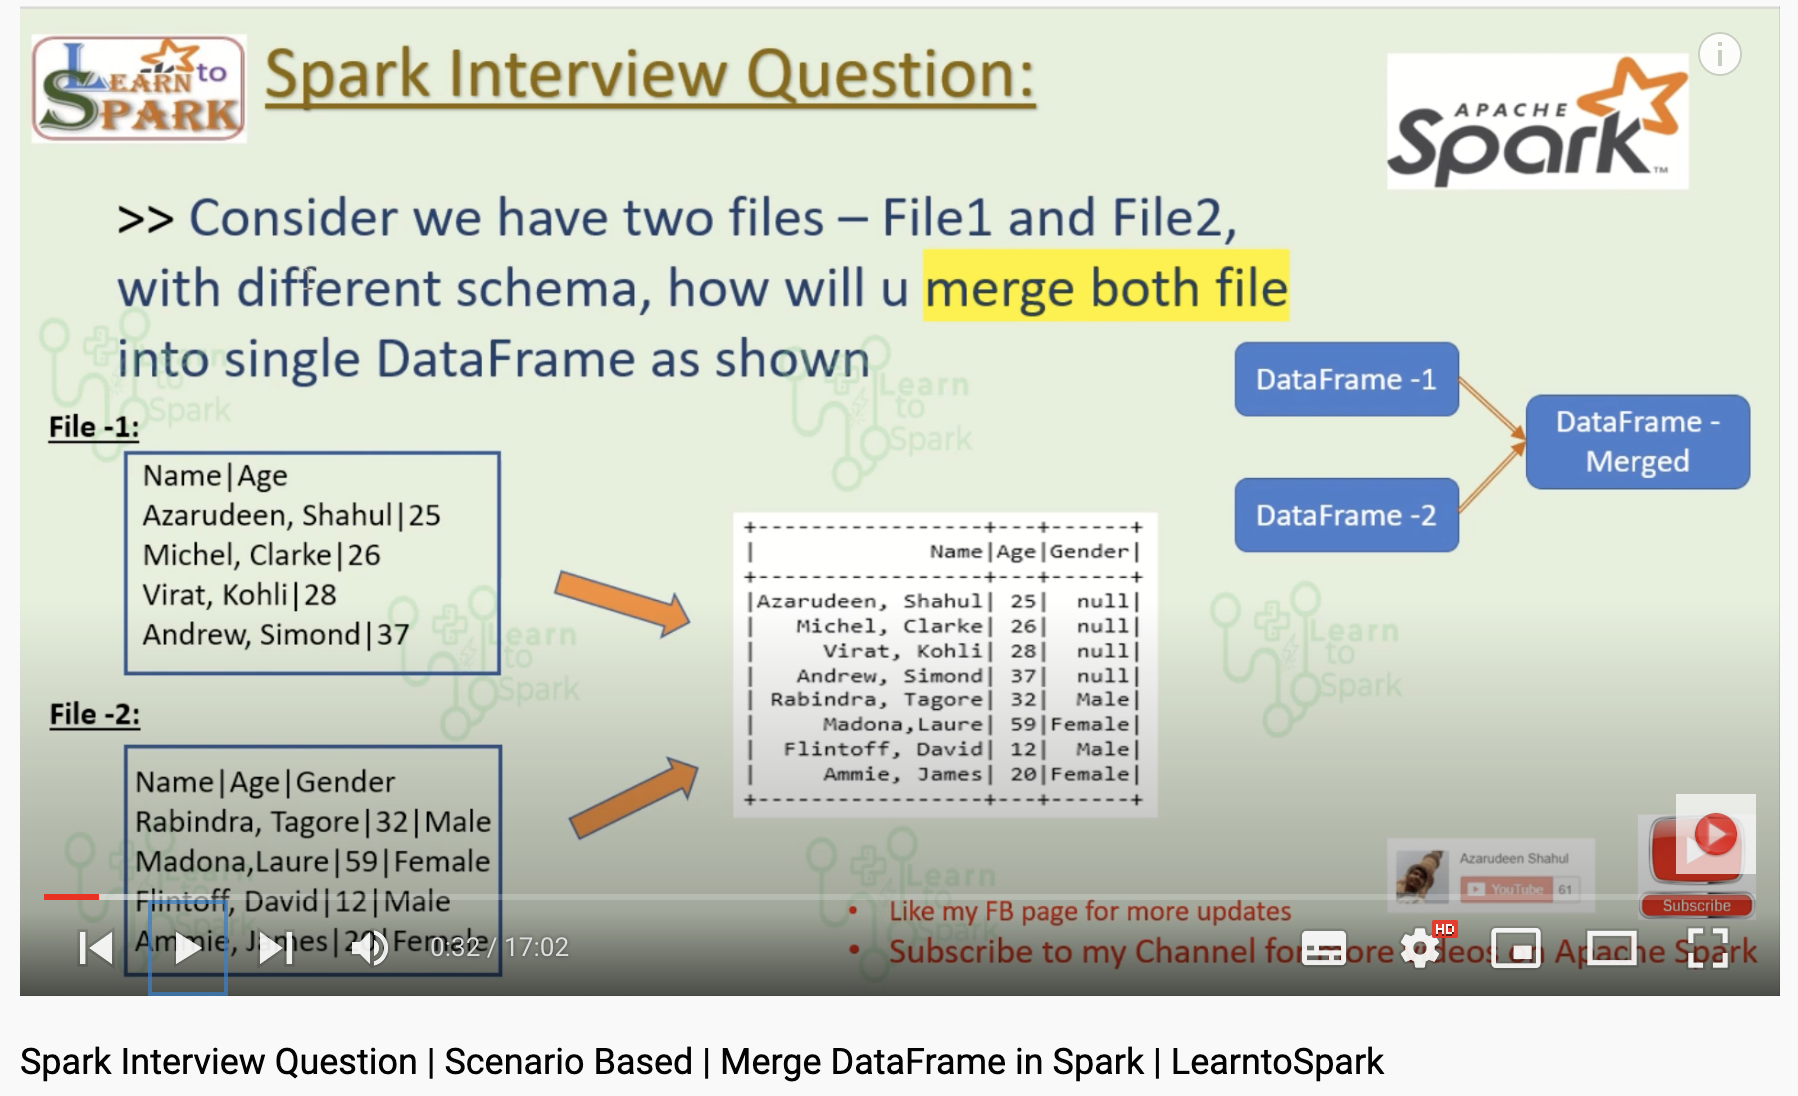

# several option
    1) with column,union
    2) define schema, union
    3) apply outer join
    4) automate the process

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Merge DF").getOrCreate()

In [110]:
df1 = spark.read.option("delimiter","|").csv("merge_input1.csv", header = True)
df2 = spark.read.option("delimiter","|").csv("merge_input2.csv", header = True)

In [111]:
df2.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)



In [113]:
df1.show()
df2.show()

+--------------+---+
|          Name|Age|
+--------------+---+
|  Abhi, Mahata| 32|
|Sharad, Tiwari| 35|
|   Arnab, Saha| 33|
|  Nazim,Shaikh| 40|
+--------------+---+

+------------+---+------+
|        Name|Age|Gender|
+------------+---+------+
|Sairaj,Patil| 31|  Male|
| Rima, Datta| 30|Female|
|   Ayan, Sen| 33|  Male|
+------------+---+------+



In [25]:
# df1.union(df2)
#won't able to apply, no of columns are different

# option1: creating new col "gender" on df1 will null value

In [116]:
from pyspark.sql.functions import lit  #to import lit: which put value in col
df1_add = df1.withColumn("Gender", lit("null"))

In [115]:
df1_add.union(df2).show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Abhi, Mahata| 32|  null|
|Sharad, Tiwari| 35|  null|
|   Arnab, Saha| 33|  null|
|  Nazim,Shaikh| 40|  null|
|  Sairaj,Patil| 31|  Male|
|   Rima, Datta| 30|Female|
|     Ayan, Sen| 33|  Male|
+--------------+---+------+



# 2) define schema, union

In [117]:
from pyspark.sql.types import *

In [124]:
#define schema
schema = StructType(
    [
        StructField("Name",StringType(),True),
        StructField("Age",StringType(),True),
        StructField("Gender",StringType(),True)
    ]
)

In [128]:
df3 = spark.read.option("delimiter","|").csv("merge_input1.csv", header = True, schema= schema)
df4 = spark.read.option("delimiter","|").csv("merge_input2.csv", header = True, schema= schema)
#here we are reading csv using schema

In [129]:
df3.show()
df4.show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Abhi, Mahata| 32|  null|
|Sharad, Tiwari| 35|  null|
|   Arnab, Saha| 33|  null|
|  Nazim,Shaikh| 40|  null|
+--------------+---+------+

+------------+---+------+
|        Name|Age|Gender|
+------------+---+------+
|Sairaj,Patil| 31|  Male|
| Rima, Datta| 30|Female|
|   Ayan, Sen| 33|  Male|
+------------+---+------+



In [130]:
df3.union(df4).show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Abhi, Mahata| 32|  null|
|Sharad, Tiwari| 35|  null|
|   Arnab, Saha| 33|  null|
|  Nazim,Shaikh| 40|  null|
|  Sairaj,Patil| 31|  Male|
|   Rima, Datta| 30|Female|
|     Ayan, Sen| 33|  Male|
+--------------+---+------+



# 3) apply outer join

In [132]:
df5 = spark.read.option("delimiter","|").csv("merge_input1.csv",header = True) 
df6 = spark.read.option("delimiter","|").csv("merge_input2.csv",header = True) 

In [133]:
df_join = df5.join(df6, on = ['Name','Age'],how="Outer")

In [176]:
df_join.show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Abhi, Mahata| 32|  null|
|   Arnab, Saha| 33|  null|
|     Ayan, Sen| 33|  Male|
|  Nazim,Shaikh| 40|  null|
|   Rima, Datta| 30|Female|
|  Sairaj,Patil| 31|  Male|
|Sharad, Tiwari| 35|  null|
+--------------+---+------+



# 4) automated approach

In [144]:
df7 = spark.read.option("delimiter","|").csv("merge_input1.csv", header =True)
df8 = spark.read.option("delimiter","|").csv("merge_input2.csv", header =True)

# column name from both df, and find the difference between those df's , and with column function will add colum,n and with union will join

In [161]:
listA = list(set(df7.columns)-set(df8.columns))
listB = list(set(df8.columns)-set(df7.columns))

In [165]:
for i in listA:
    df8 = df8.withColumn(i,lit("null"))
    
for i in listB:
    df7 = df7.withColumn(i, lit("null"))


In [167]:
df7.show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Abhi, Mahata| 32|  null|
|Sharad, Tiwari| 35|  null|
|   Arnab, Saha| 33|  null|
|  Nazim,Shaikh| 40|  null|
+--------------+---+------+



In [173]:
df8.union(df7).show()

+--------------+---+------+
|          Name|Age|Gender|
+--------------+---+------+
|  Sairaj,Patil| 31|  Male|
|   Rima, Datta| 30|Female|
|     Ayan, Sen| 33|  Male|
|  Abhi, Mahata| 32|  null|
|Sharad, Tiwari| 35|  null|
|   Arnab, Saha| 33|  null|
|  Nazim,Shaikh| 40|  null|
+--------------+---+------+

